# Last.fm Data Analysis of Music Listening History

The csv data files were created with [lastfm_downloader.ipynb](lastfm_downloader.ipynb)

---------

In [1]:
import pandas as pd, numpy as np, string, re, pytz
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime as dt
%matplotlib inline

In [2]:
# define the fonts to use for plots
family = 'DejaVu Sans'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

In [3]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    import matplotlib.cm as cm, numpy as np
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

## Top artists

In [4]:
artists_most = pd.read_csv('data/lastfm_top_artists.csv', encoding='utf-8')
artists_most = artists_most.set_index('artist')['play_count'].head(25)
artists_most.head()

artist
Flight Facilities    256
Mitch Murder         189
The Shins            160
Admo                 141
Midlake              132
Name: play_count, dtype: int64

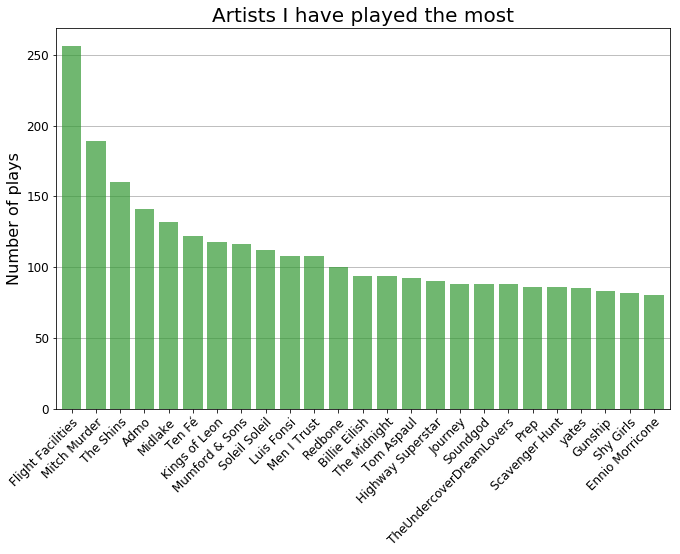

In [5]:
ax = artists_most.plot(kind='bar', figsize=[11, 7], width=0.8, alpha=0.7, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(artists_most.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Artists I have played the most', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)

# plt.savefig('images/lastfm-artists-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

## Top tracks

In [6]:
tracks_most = pd.read_csv('data/lastfm_top_tracks.csv', encoding='utf-8')

def make_label(row, maxlength=30, suffix='...'):
    artist = row['artist']
    track = row['track']
    if len(track) > maxlength:
        track = '{}{}'.format(track[:maxlength-len(suffix)], suffix)
    return '{}\n{}'.format(artist, track)

index = tracks_most.apply(make_label, axis='columns')
tracks_most = tracks_most.set_index(index).drop(labels=['artist', 'track'], axis='columns')
tracks_most = tracks_most['play_count'].head(20)
tracks_most.head()

Admo\nSparks                                     141
Soleil Soleil\nI'm At The Bottom Of The Ocean    112
Men I Trust\nLauren                              106
Redbone\nCome and Get Your Love                  100
Luis Fonsi\nDespacito ft  Daddy Yankee           100
Name: play_count, dtype: int64

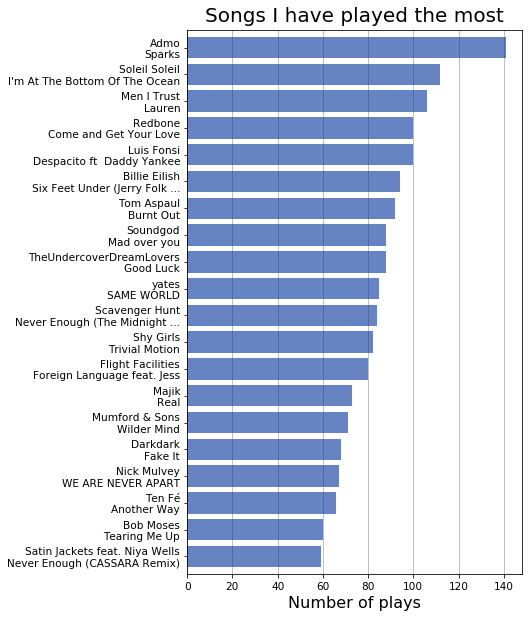

In [7]:
ax = tracks_most.sort_values().plot(kind='barh', figsize=[6, 10], width=0.8, alpha=0.6, 
                                    color='#003399', edgecolor=None, zorder=2)
ax.xaxis.grid(True)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
ax.set_xlabel('Number of plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('Songs I have played the most', fontproperties=title_font, y=1.005)

# plt.savefig('images/lastfm-tracks-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

## Top albums

In [8]:
albums_most = pd.read_csv('data/lastfm_top_albums.csv', encoding='utf-8')

def make_label(row, maxlength=25, suffix='...'):
    artist = row['artist']
    track = row['album']
    if len(track) > maxlength:
        track = '{}{}'.format(track[:maxlength-len(suffix)], suffix)
    return '{}\n{}'.format(artist, track)

index = albums_most.apply(make_label, axis='columns')
albums_most = albums_most.set_index(index).drop(labels=['artist', 'album'], axis='columns')
albums_most = albums_most['play_count'].head(30)
albums_most.head()

Generationals\nBIRP! September 2014    217
Gems\nBIRP! July 2014                  161
De La Montaña\nBIRP! September 2011    110
Her\nBIRP! November 2015               108
Monma\nChillhop Essentials Sp...        91
Name: play_count, dtype: int64

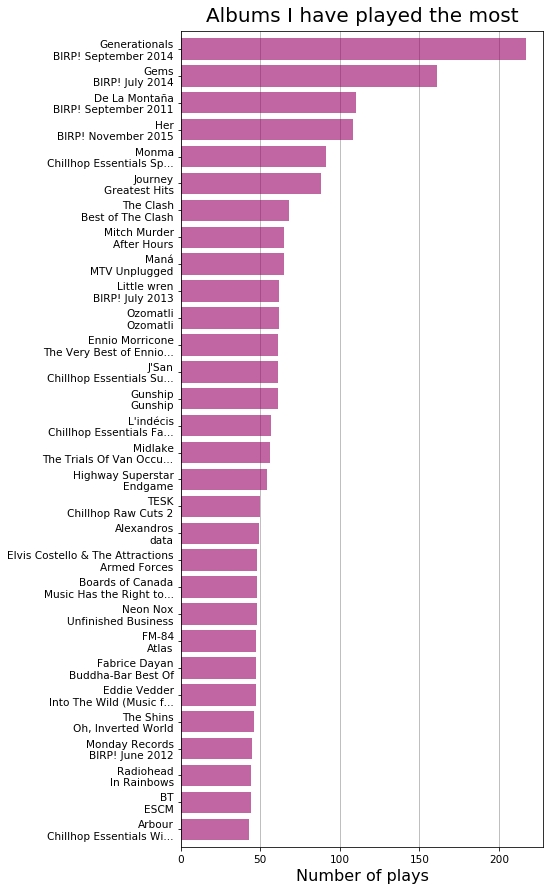

In [9]:
ax = albums_most.sort_values().plot(kind='barh', figsize=[6.5, 15], width=0.8, alpha=0.6, color='#990066', 
                                    edgecolor=None, zorder=2)
ax.xaxis.grid(True)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
ax.set_xlabel('Number of plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('Albums I have played the most', fontproperties=title_font, y=1.005)

# plt.savefig('images/lastfm-albums-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

## All-time scrobbles

In [10]:
# read the all-time scrobbles data set
scrobbles = pd.read_csv('data/lastfm_scrobbles.csv', encoding='utf-8')
scrobbles = scrobbles.drop('timestamp', axis=1)
print('{:,} total scrobbles'.format(len(scrobbles)))
print('{:,} total artists'.format(len(scrobbles['artist'].unique())))

17,220 total scrobbles
3,307 total artists


According to the last.fm web site, I have ~300,000 scrobbles. This API endpoint seems to miss the ones from before 2007.

In [11]:
# convert to datetime
scrobbles['timestamp'] = pd.to_datetime(scrobbles['datetime'])

In [12]:
# reorder and reindex based on date
scrobbles = scrobbles.sort_values(by='timestamp').reset_index(drop=True)
# activities.reset_index(drop=True)

In [13]:
# functions to convert UTC to Shanghai time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('Asia/Shanghai'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_day_of_week = lambda x: convert_tz(x).weekday()

These lambda functions are inefficient, but necessary to workaround this bug: https://github.com/pydata/pandas/issues/11757. I can update them when the bug is fixed in a future pandas version.

In [14]:
# parse out date and time elements as Shanghai time
scrobbles['year'] = scrobbles['timestamp'].map(get_year)
scrobbles['month'] = scrobbles['timestamp'].map(get_month)
scrobbles['date'] = scrobbles['timestamp'].map(get_date)
scrobbles['day'] = scrobbles['timestamp'].map(get_day)
scrobbles['hour'] = scrobbles['timestamp'].map(get_hour)
scrobbles['dow'] = scrobbles['timestamp'].map(get_day_of_week)
scrobbles = scrobbles.drop(labels=['datetime'], axis=1)

# drop rows with 01-01-1970 as timestamp
scrobbles = scrobbles[scrobbles['year'] > 1970]
scrobbles.head()

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,date,day,hour,dow
0,Broken Social Scene,2eada8f8-056a-4093-bbc2-004909ce743b,Forgiveness Rock Record,b04a480a-efd2-4227-954e-215450960946,World Sick,2c3df6c4-a0a4-46b5-b383-af9475cba2d9,2011-08-13 11:15:50,2011,2011-08,2011-08-13,13,19,5
1,Mumford & Sons,c44e9c22-ef82-4a77-9bcd-af6c958446d6,Sigh No More,d751cba4-242e-46d8-b230-3ca1d4e59b85,Timshel,3d693d92-3c17-41c8-bf16-f27b2c5b4a8b,2011-08-13 11:22:39,2011,2011-08,2011-08-13,13,19,5
2,Pomplamoose,63d61461-ecfe-4057-896b-3ba3ff3111eb,BIRP! July 2014,NaN,30 Rock,NaN,2016-08-30 10:44:53,2016,2016-08,2016-08-30,30,18,1
3,Duplekita,e5198716-56da-4040-899b-674e3a088073,BIRP! July 2014,NaN,The Sound of My Name,NaN,2016-08-30 10:47:35,2016,2016-08,2016-08-30,30,18,1
4,Elder Island,c1344d27-2eaf-43e0-a769-9e5285c58866,BIRP! July 2014,NaN,The Big Unknown,05c81332-e5f9-48f4-a5d4-08cbcc88c032,2016-08-30 10:55:40,2016,2016-08,2016-08-30,30,18,1


All the last.fm timestamps of my scrobbles appear to be UTC, but the year, month, day, hour columns are now converted to Pacific Time (where I've done nearly all my listening)

## Year-by-year analysis

Visualize the number of scrobbles per year

In [15]:
year_counts = scrobbles['year'].value_counts().sort_index()

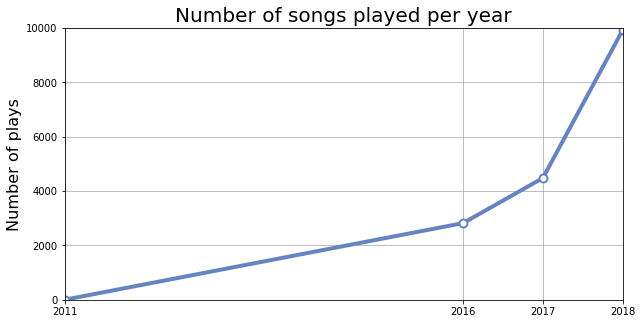

In [16]:
year_counts = scrobbles['year'].value_counts().sort_index()
ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 10000)
ax.set_xticks(year_counts.index)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per year', fontproperties=title_font)

# plt.savefig('images/lastfm-scrobbles-per-year.png', dpi=96, bbox_inches='tight')
plt.show()

## Month-by-month analysis

Visualize the number of scrobbles per month from 2010 through the present day

In [17]:
# get all the scrobbles from 2010-present
min_year = 2016
scrobbles_10 = scrobbles[scrobbles['year'] >= min_year]
max_year = max(scrobbles_10['year'])

In [18]:
# count number of scrobbles in each month
month_counts = scrobbles_10['month'].value_counts().sort_index()

# not every month necessarily has a scrobble, so fill in missing months with zero counts
date_range = pd.date_range(start=min(scrobbles_10['timestamp']), end=max(scrobbles_10['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

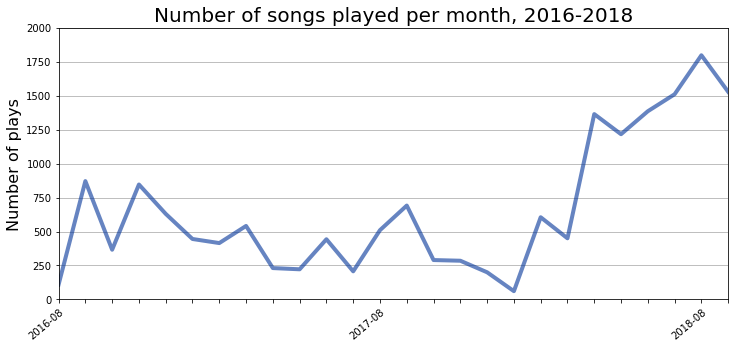

In [19]:
ax = month_counts.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=0.6, color='#003399')

xlabels = month_counts.iloc[range(0, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.set_xlim((0, len(month_counts)-1))

ax.yaxis.grid(True)
ax.set_ylim((0,2000))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per month, {}-{}'.format(min_year, max_year), fontproperties=title_font)

# plt.savefig('images/lastfm-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()

## Day of the week analysis

How many songs have been played on each day of the week?

In [20]:
# get the play count sum by day of the week
dow_counts = scrobbles['dow'].value_counts().sort_index()
dow_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

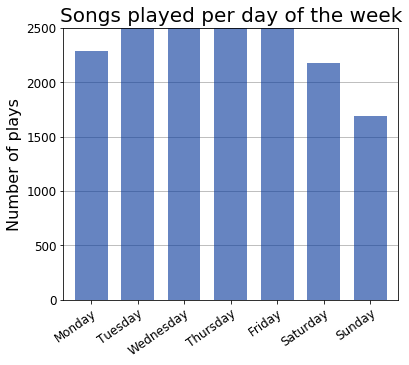

In [21]:
ax = dow_counts.plot(kind='bar', figsize=[6, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(dow_counts.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_ylim((0, 2500))
ax.set_title('Songs played per day of the week', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)

# plt.savefig('images/lastfm-scrobbles-per-weekday.png', dpi=96, bbox_inches='tight')
plt.show()

## Hour of the day analysis

How many songs have been played during each hour of the day?

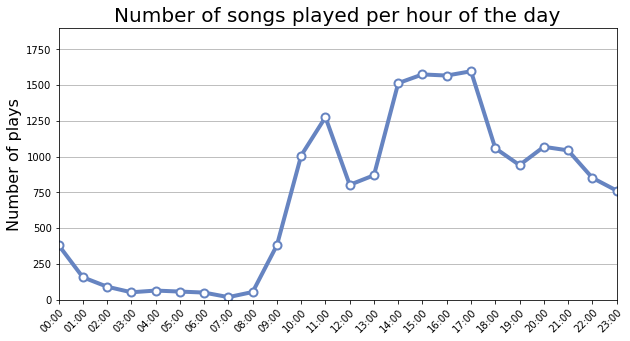

In [22]:
hour_counts = scrobbles['hour'].value_counts().sort_index()
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hour_counts.index[0], hour_counts.index[-1]))

ax.yaxis.grid(True)
ax.set_ylim((0, 1900))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=title_font)

# plt.savefig('images/lastfm-scrobbles-per-hour.png', dpi=96, bbox_inches='tight')
plt.show()

## Analysis by day of the week + hour of the day

How many songs have been played during each hour of the day on each day of the week?

In [23]:
# get the play counts by hour of day and day of week
weekday_hour_counts = scrobbles.groupby(['dow','hour']).count()['track']
hour_numbers = weekday_hour_counts.index.levels[1]
day_numbers = weekday_hour_counts.index.levels[0]
day_names = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

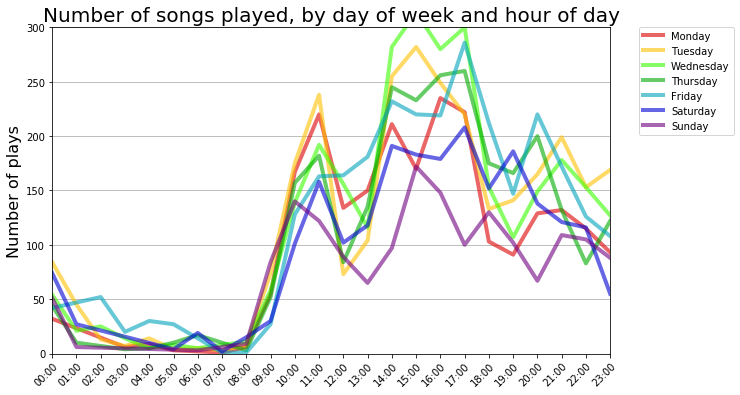

In [24]:
# get one color per day of week
colors = get_colors('nipy_spectral_r', n=len(day_numbers), start=0.1, stop=0.95)

fig, ax = plt.subplots(figsize=[10, 6])
lines = []
for day, c in zip(day_numbers, colors):
    ax = weekday_hour_counts[day].plot(kind='line', linewidth=4, alpha=0.6, c=c)
    lines.append(day_names[day])
    
xlabels = hour_numbers.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hour_numbers[0], hour_numbers[-1]))

ax.yaxis.grid(True)
ax.set_ylim([0, 300])
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played, by day of week and hour of day', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.23,1.017))

# plt.savefig('images/lastfm-scrobbles-days-hours.png', dpi=96, bbox_inches='tight')
plt.show()

## Analysis of a single year (or multiple years)

Add additional years to the 'isin' list to query multiple years.

In [25]:
scrobbles_year = scrobbles[scrobbles['year'].isin([2018])]
len(scrobbles_year)

9916

In [26]:
# what artists did i play the most that year?
artists_year = scrobbles_year['artist'].value_counts()
artists_year = pd.DataFrame(artists_year).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_year.index = [n + 1 for n in artists_year.index]
artists_year.head(10)

,artist,play count
1,Mitch Murder,189
2,Midlake,127
3,The Midnight,94
4,Highway Superstar,90
5,Gunship,83
6,Kings of Leon,81
7,FM-84,78
8,Phaserland,72
9,Lindstrøm,59
10,Neon Nox,56


In [27]:
# what tracks did i play the most that year?
tracks_year = scrobbles_year.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_year = tracks_year.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_year.index = [n + 1 for n in tracks_year.index]
tracks_year.head(10)

,artist,track,play count
1,Neon Nox,Checkpoint - Original Mix,45
2,Sebastian Gampl,One On One (feat. Tommy Reeve),36
3,The Midnight,Days of Thunder,33
4,Sofia Reyes,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",28
5,Silva,Fica Tudo Bem,27
6,michael oakley,Turn Back Time,27
7,VHS DREAMS,Miami's Finest,27
8,FM-84,Never Stop,26
9,Highway Superstar,Hunters,26
10,Mitch Murder,Sniper Rouge,24


In [28]:
# what albums did i play the most that year?
albums_year = scrobbles_year.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_year = albums_year.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_year.index = [n + 1 for n in albums_year.index]

# remove text in parentheses or brackets
regex = re.compile('\\(.*\\)|\\[.*]')
albums_year['album'] = albums_year['album'].map(lambda x: regex.sub('', x))
albums_year.head(10)

,artist,album,play count
1,Mitch Murder,After Hours,65
2,Gunship,Gunship,61
3,Midlake,The Trials Of Van Occupanther,56
4,Highway Superstar,Endgame,54
5,Alexandros,data,49
6,Neon Nox,Unfinished Business,48
7,Eddie Vedder,Into The Wild,47
8,FM-84,Atlas,47
9,Sebastian Gampl,City Hunter,43
10,The Midnight,Days of Thunder,42


## Analysis of a single month (or multiple months)

Add additional months to the 'isin' list to query multiple months.

In [29]:
scrobbles_month = scrobbles[scrobbles['month'].isin(['2018-06'])]
len(scrobbles_month)

1385

In [30]:
# what artists did i play the most that month?
artists_month = scrobbles_month['artist'].value_counts()
artists_month = pd.DataFrame(artists_month).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_month.index = [n + 1 for n in artists_month.index]
artists_month.head(10)

,artist,play count
1,Mitch Murder,66
2,Phaserland,26
3,The Midnight,24
4,Alexandros,23
5,Maroon 5,22
6,FM-84,22
7,Brian Eno,21
8,Neon Nox,18
9,Intelligence Dept.,17
10,Timecop1983,15


In [31]:
# what tracks did i play the most that month?
tracks_month = scrobbles_month.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_month = tracks_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_month.index = [n + 1 for n in tracks_month.index]
tracks_month.head(10)

,artist,track,play count
1,Maroon 5,What Lovers Do (feat. SZA),12
2,Timecop1983,River of Darkness,11
3,Neon Nox,Checkpoint - Original Mix,11
4,Mitch Murder,Coup De Théâtre,9
5,The Midnight,Days of Thunder,9
6,Sebastian Gampl,One On One (feat. Tommy Reeve),8
7,Phaserland,Hot Stunner (feat. Nikki Dodds),8
8,Highway Superstar,Hunters,8
9,Mitch Murder,Bertone's Theme,8
10,Mitch Murder,After Hours Run,8


In [32]:
# what albums did i play the most that month?
albums_month = scrobbles_month.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_month = albums_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_month.index = [n + 1 for n in albums_month.index]
albums_month.head(10)

,artist,album,play count
1,Mitch Murder,After Hours,53
2,Alexandros,data,23
3,Maroon 5,Red Pill Blues (Deluxe),19
4,Phaserland,Electric Atlantic,17
5,Intelligence Dept.,Sleeping City,17
6,A Perfect Circle,Mer De Noms,14
7,FM-84,Atlas,14
8,Radiohead,In Rainbows,13
9,Neon Nox,Unfinished Business,12
10,Lykke Li,So sad so sexy,11


## Listening history of a specific artist, album, or track

See the last 5 times I've listened to someone or something

In [33]:
# when were the last 5 times I played something by Midlake?
scrobbles[scrobbles['artist'].str.contains('Midlake')].head()

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,date,day,hour,dow
2946,Midlake,da90b5da-349e-4906-a0b4-805f5e46190d,Trials of Van Occupanther,deda87e2-3758-4812-af82-b33e842c6a7a,Roscoe,09ade487-5607-4883-a95f-e9f435a9ac30,2017-01-03 06:24:39,2017,2017-01,2017-01-03,3,14,1
2947,Midlake,da90b5da-349e-4906-a0b4-805f5e46190d,Trials of Van Occupanther,deda87e2-3758-4812-af82-b33e842c6a7a,Roscoe,09ade487-5607-4883-a95f-e9f435a9ac30,2017-01-03 06:29:28,2017,2017-01,2017-01-03,3,14,1
2948,Midlake,da90b5da-349e-4906-a0b4-805f5e46190d,Trials of Van Occupanther,deda87e2-3758-4812-af82-b33e842c6a7a,Roscoe,09ade487-5607-4883-a95f-e9f435a9ac30,2017-01-03 06:34:18,2017,2017-01,2017-01-03,3,14,1
2949,Midlake,da90b5da-349e-4906-a0b4-805f5e46190d,Trials of Van Occupanther,deda87e2-3758-4812-af82-b33e842c6a7a,Roscoe,09ade487-5607-4883-a95f-e9f435a9ac30,2017-01-03 06:39:07,2017,2017-01,2017-01-03,3,14,1
6157,Midlake,da90b5da-349e-4906-a0b4-805f5e46190d,Trials of Van Occupanther,deda87e2-3758-4812-af82-b33e842c6a7a,Roscoe,09ade487-5607-4883-a95f-e9f435a9ac30,2017-09-09 09:15:40,2017,2017-09,2017-09-09,9,17,5


In [34]:
# when were the last 5 times I played something off of a Greatest Hits Album?
scrobbles[scrobbles['album'].fillna('').str.contains('Greatest Hits')].head()

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,date,day,hour,dow
942,Journey,abd506e1-6f2b-4d6f-b937-92c267f6f88b,Greatest Hits,03ffc721-3d27-4fb9-a394-c06da971ee5b,Send Her My Love,cac13602-96cc-4591-8477-0b57a4bbcb41,2016-09-27 16:39:00,2016,2016-09,2016-09-28,28,0,2
990,Journey,abd506e1-6f2b-4d6f-b937-92c267f6f88b,Greatest Hits,03ffc721-3d27-4fb9-a394-c06da971ee5b,Lovin' Touchin' Squeezin',87a25f92-38a1-4e42-8ab5-2ea1391db023,2016-10-05 09:57:52,2016,2016-10,2016-10-05,5,17,2
991,Journey,abd506e1-6f2b-4d6f-b937-92c267f6f88b,Greatest Hits,03ffc721-3d27-4fb9-a394-c06da971ee5b,Lights,25a2e319-e508-40e3-8b42-88e7c7b3dcd8,2016-10-05 10:01:47,2016,2016-10,2016-10-05,5,18,2
992,Journey,abd506e1-6f2b-4d6f-b937-92c267f6f88b,Greatest Hits,03ffc721-3d27-4fb9-a394-c06da971ee5b,Ask the Lonely,3660c179-63a0-4584-8aac-5e61fe60ec65,2016-10-05 10:04:58,2016,2016-10,2016-10-05,5,18,2
993,Journey,abd506e1-6f2b-4d6f-b937-92c267f6f88b,Greatest Hits,03ffc721-3d27-4fb9-a394-c06da971ee5b,Separate Ways (Worlds Apart),4f53d4e8-1dea-416d-a548-61b3a5935954,2016-10-05 10:08:53,2016,2016-10,2016-10-05,5,18,2


In [35]:
# when were the last 5 times I played Maneater?
scrobbles[scrobbles['track'].str.contains('Maneater')].head()

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,date,day,hour,dow
1200,Hall & Oates,debabff3-2559-46e5-862d-ef2a906d7010,NaN,NaN,Maneater (The Apple Scruffs Mix),NaN,2016-10-21 08:05:04,2016,2016-10,2016-10-21,21,16,4
1239,Hall & Oates,debabff3-2559-46e5-862d-ef2a906d7010,NaN,NaN,Maneater (The Apple Scruffs Mix),NaN,2016-10-24 08:33:44,2016,2016-10,2016-10-24,24,16,0
1254,Hall & Oates,debabff3-2559-46e5-862d-ef2a906d7010,NaN,NaN,Maneater (The Apple Scruffs Mix),NaN,2016-10-25 08:46:27,2016,2016-10,2016-10-25,25,16,1
1257,Hall & Oates,debabff3-2559-46e5-862d-ef2a906d7010,NaN,NaN,Maneater (The Apple Scruffs Mix),NaN,2016-10-26 08:15:07,2016,2016-10,2016-10-26,26,16,2
1368,Hall & Oates,debabff3-2559-46e5-862d-ef2a906d7010,NaN,NaN,Maneater (The Apple Scruffs Mix),NaN,2016-11-02 07:52:08,2016,2016-11,2016-11-02,2,15,2


## Visualize top artists over time

How have the cumulative plays of most listened-to artists changed over time?

In [36]:
# get the cumulative play counts since 2009 for the top n most listened-to artists
n = 6
plays = scrobbles[scrobbles['artist'].isin(artists_most.head(n).index)]
plays = plays[plays['year'] >= 2009]
plays = plays.groupby(['artist','year']).count().groupby(level=[0]).cumsum()['track']

# make sure we have each year represented for each artist, even if they got no plays that year
plays = plays.unstack().T.fillna(method='ffill').T.stack()
top_artists = plays.index.levels[0]

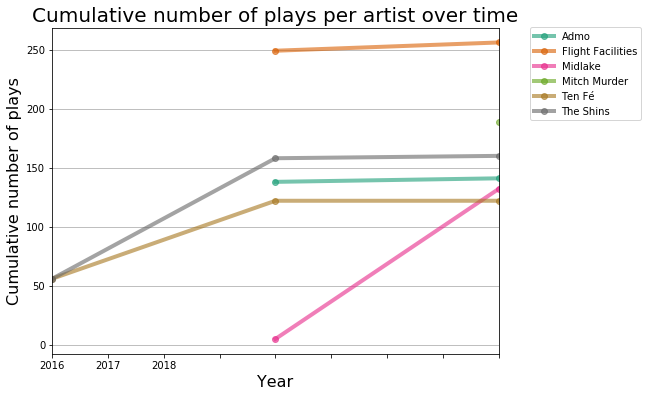

In [37]:
# get one color per artist
colors = get_colors('Dark2', n)

fig, ax = plt.subplots(figsize=[8, 6])
lines = []
for artist, c in zip(top_artists, colors):
    ax = plays[artist].plot(kind='line', linewidth=4, alpha=0.6, marker='o', c=c)
    lines.append(artist)
    
ax.set_xlim((plays.index.get_level_values(1).min(), plays.index.get_level_values(1).max()))

ax.yaxis.grid(True)
ax.set_xticklabels(plays.index.levels[1], rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Cumulative number of plays', fontproperties=label_font)
ax.set_xlabel('Year', fontproperties=label_font)
ax.set_title('Cumulative number of plays per artist over time', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.33, 1.016))

# plt.savefig('images/lastfm-scrobbles-top-artists-years.png', dpi=96, bbox_inches='tight')
plt.show()

## Characteristics of artists' names

Text analysis of artist name strings

In [38]:
# remove 'The ' and 'A ' preceding artist names, get unique set of names, then get first letter frequency
artists_clean = scrobbles['artist'].str.replace('The ','').str.replace('A ','')
first_letters = pd.Series(artists_clean.unique()).map(lambda x: x.upper()[0]).value_counts()
first_letters = first_letters[[c for c in string.ascii_uppercase]]

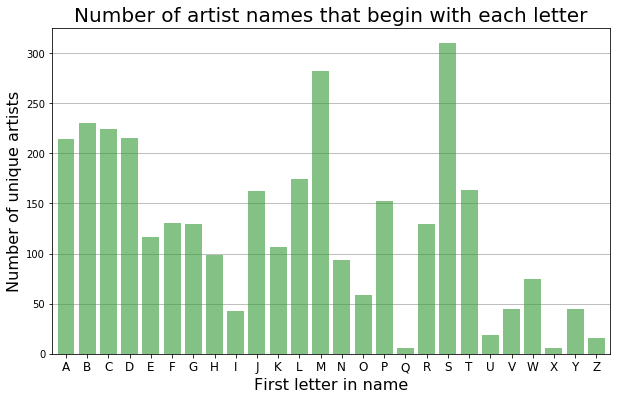

In [39]:
# plot the frequency of artist names that begin with each letter
ax = first_letters.plot(kind='bar', figsize=[10, 6], width=0.8, alpha=0.6, color='#339933', edgecolor=None, zorder=2)
ax.yaxis.grid(True)
ax.set_xticklabels(first_letters.index, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)

ax.set_title('Number of artist names that begin with each letter', fontproperties=title_font)
ax.set_xlabel('First letter in name', fontproperties=label_font)
ax.set_ylabel('Number of unique artists', fontproperties=label_font)

# plt.savefig('images/lastfm-artists-first-letter-count.png', dpi=96, bbox_inches='tight')
plt.show()

In [40]:
# which artist names begin with the letter 'X'?
str(list(pd.Series(artists_clean[artists_clean.str.upper().str.startswith('X')].unique())))

"['xx', 'Xavier Luna', 'XTC', 'XXYYXX', 'xJK.', 'Ximena Sariñana']"

In [41]:
# what are the most common first words in artist names that begin with 'M'?
artists_m = pd.Series(artists_clean[artists_clean.str.upper().str.startswith('M')].unique())
artists_m.map(lambda x: x.split()[0]).value_counts().head(15)

Matt        8
Mr.         6
Midnight    6
Magic       4
Mark        4
Mac         3
Max         3
Mad         3
Mr          3
My          3
Michael     3
Mighty      2
Miles       2
Manny       2
Matthew     2
dtype: int64

In [42]:
# what are the most common first words in all the artist names?
pd.Series(scrobbles['artist'].unique()).map(lambda x: x.split()[0].lower()).value_counts().head(15)

the       164
david      14
dj         14
a          12
john        9
tom         8
george      8
matt        8
black       7
mr.         7
la          7
little      7
chris       7
dream       6
james       6
dtype: int64

In [43]:
# what are the most common words in all the artist names, anywhere in the name?
word_list = []
stop_list = ['&','the','and','of','a','in','for','la','los','el','de','y']
for artist in artists_clean.unique():
    for word in artist.split():
        word_list.append(word.lower())

word_list = [word for word in word_list if word not in stop_list]
pd.Series(word_list).value_counts().head(15)

david     15
dj        14
black     14
club      13
band      11
john      11
white     10
james     10
trio      10
little     9
ben        9
sea        9
sounds     9
new        8
smith      8
dtype: int64

In [44]:
# what is the longest artist name?
print('"{}"'.format(max(artists_clean, key=len)))

"Chef Makes One of Gordon's Dishes and He's Not Happy"


In [45]:
# what is the distribution of lengths of artist names (up to n number of characters)?
n = 50
name_lengths = pd.Series([len(artist) for artist in artists_clean.unique()])
name_lengths = name_lengths.value_counts().sort_index()
name_lengths = name_lengths.iloc[0:n+1].reindex(range(n+1), fill_value=0)

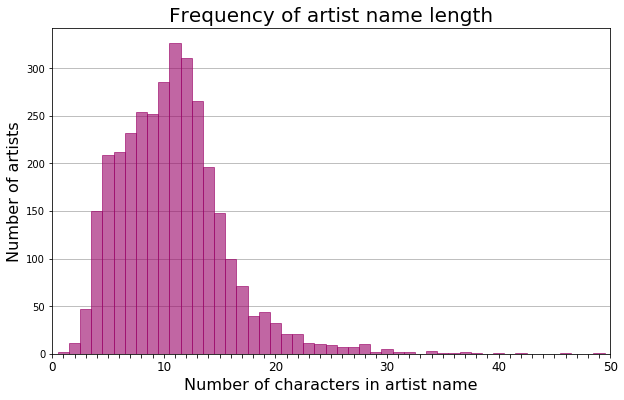

In [46]:
ax = name_lengths.plot(kind='bar', figsize=(10,6), alpha=0.6, width=1, color='#990066', edgecolor='#990066', zorder=2)

xlabels = [x if x % 10 == 0 else '' for x in name_lengths.index]
ax.set_xticklabels(xlabels, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
ax.yaxis.grid(True)
ax.set_xlim((0,n))

ax.set_title('Frequency of artist name length', fontproperties=title_font)
ax.set_xlabel('Number of characters in artist name', fontproperties=label_font)
ax.set_ylabel('Number of artists', fontproperties=label_font)

# plt.savefig('images/lastfm-artists-name-length.png', dpi=96, bbox_inches='tight')
plt.show()

# Checking for Duplicates

In [47]:
len(scrobbles[scrobbles.duplicated() == True])

0

In [48]:
scrobbles[scrobbles.duplicated() == True].head() # single duplicate

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,date,day,hour,dow


In [49]:
# when were the last 5 times I played something by My Bloody Valentine?
scrobbles[scrobbles['artist'].str.contains('Mariza')].head()

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,date,day,hour,dow
1954,Mariza,8cbb4d57-f44d-433a-90bf-a0892af886e1,Transparente,68d8d045-630b-3ba5-8ab9-0b7929625706,Fado Tordo,ee0e9a2d-4932-40c3-a008-6aeb3f6bbdf4,2016-11-20 06:45:24,2016,2016-11,2016-11-20,20,14,6
1958,Mariza,8cbb4d57-f44d-433a-90bf-a0892af886e1,Fado Em Mim,c7791e52-0980-40be-8de7-a770400428ee,O Gente Da Minha Terra,NaN,2016-11-20 06:56:27,2016,2016-11,2016-11-20,20,14,6
1961,Mariza,8cbb4d57-f44d-433a-90bf-a0892af886e1,Transparente,68d8d045-630b-3ba5-8ab9-0b7929625706,Recusa,aed913f8-1115-44ce-a38e-b0b6ac6624e1,2016-11-20 07:10:58,2016,2016-11,2016-11-20,20,15,6
1963,Mariza,8cbb4d57-f44d-433a-90bf-a0892af886e1,Fado Em Mim,c7791e52-0980-40be-8de7-a770400428ee,Chuva,54035c14-e5ef-48db-9110-ac7e9f37368f,2016-11-20 07:17:18,2016,2016-11,2016-11-20,20,15,6
1964,Mariza,8cbb4d57-f44d-433a-90bf-a0892af886e1,Fado Em Mim,c7791e52-0980-40be-8de7-a770400428ee,Maria Lisboa,54f50deb-caec-4bd2-94e6-ce9fa400f16d,2016-11-20 07:21:23,2016,2016-11,2016-11-20,20,15,6


# Monthly Review: Music Listening

In [50]:
targetMonth = '2018-08' # edit month here
scrobbles_month = scrobbles[scrobbles['month'].isin([targetMonth])]
len(scrobbles_month)

1797

In [51]:
# listening during which hours
len(scrobbles_month.hour.unique())

20

In [52]:
# what artists did i play the most that month?
artists_month = scrobbles_month['artist'].value_counts()
artists_month = pd.DataFrame(artists_month).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_month.index = [n + 1 for n in artists_month.index]
artists_month.head(10)

,artist,play count
1,Charlie Cunningham,44
2,La Ley,40
3,J Balvin,31
4,Sofia Reyes,26
5,Juan Magán,24
6,Canyon City,20
7,Vincenzo Salvia,19
8,Mitch Murder,19
9,Shakira,17
10,Aeon Rings,15


In [53]:
# what tracks did i play the most that month?
tracks_month = scrobbles_month.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_month = tracks_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_month.index = [n + 1 for n in tracks_month.index]
tracks_month.head(10)

,artist,track,play count
1,Sofia Reyes,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",25
2,Juan Magán,Usted,19
3,Charlie Cunningham,"Minimum (Live from Spotify, London)",19
4,Daddy Yankee,Dura - Remix,12
5,Juanes,Pa Dentro,11
6,Shakira,Clandestino,11
7,Vincenzo Salvia,Le strade di Cortina,11
8,Nio Garcia,Te Boté - Remix,10
9,J Balvin,Mi Gente,9
10,Nicky Jam,X - Remix,9


In [54]:
# what albums did i play the most that month?
albums_month = scrobbles_month.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_month = albums_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_month.index = [n + 1 for n in albums_month.index]
albums_month.head(10)

,artist,album,play count
1,Charlie Cunningham,Spotify Live,36
2,Sofia Reyes,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",25
3,Juan Magán,Usted,19
4,La Ley,La Ley MTV Unplugged,19
5,Aeon Rings,Floods,15
6,Canyon City,Constellation,14
7,La Ley,Adaptación,12
8,Daddy Yankee,Dura (Remix),12
9,Absolute Valentine,Sunset Love,11
10,Midlake,The Trials Of Van Occupanther,11


In [55]:
# listening days
listeningDays = len(scrobbles_month.day.unique())

In [56]:
# percentage of listening days in month
# total days in month
from datetime import datetime
dt = datetime.strptime(targetMonth, '%Y-%m')
from calendar import monthrange
round((listeningDays / monthrange(dt.year, dt.month)[1]), 3)

0.935

In [57]:
scrobbles_month['hour'].head()

13895    20
13896    20
13897    20
13898    20
13899    20
Name: hour, dtype: int64

In [58]:
hour_counts = scrobbles_month['hour'].value_counts().sort_index()
hour_counts

0      20
1      19
2      17
3       4
8      17
9      70
10    150
11    132
12     55
13    110
14    155
15     93
16    132
17    134
18    106
19     59
20     35
21    149
22    162
23    178
Name: hour, dtype: int64

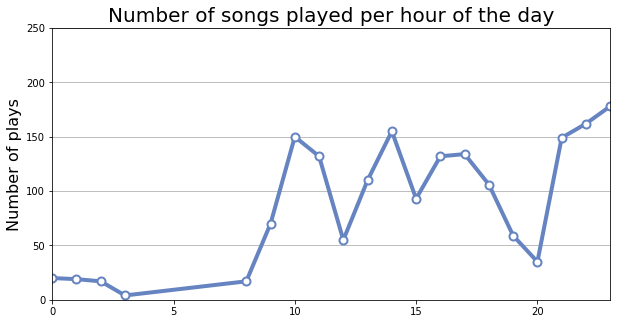

In [59]:
hour_counts = scrobbles_month['hour'].value_counts().sort_index()
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((hour_counts.index[0], hour_counts.index[-1]))

ax.yaxis.grid(True)
ax.set_ylim((0, 250))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=title_font)

plt.show()

-----

## Daily Songs Listened To

In [60]:
# how many songs did I listen to per day?
daily_counts = scrobbles['date'].value_counts().sort_index()
print('{:,} total days of music listening'.format(len(daily_counts)))
daily_counts.tail(10)

567 total days of music listening


2018-09-10     61
2018-09-11    106
2018-09-12     78
2018-09-13     43
2018-09-14     84
2018-09-15     57
2018-09-16     74
2018-09-17     67
2018-09-18     35
2018-09-19     62
Name: date, dtype: int64

In [61]:
daily_counts.to_csv("data/lastfm_daily_listens.csv")

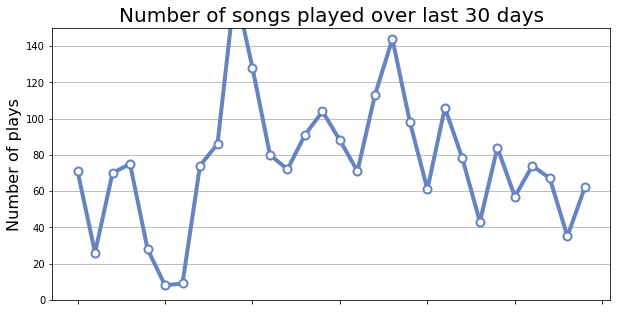

In [62]:
dataset = daily_counts.tail(30)
ax = dataset.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((dataset.index[0], dataset.index[-1]))

ax.yaxis.grid(True)
ax.set_ylim((0, 150))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played over last 30 days', fontproperties=title_font)

plt.show()

-----

## Hourly Songs Listened To

In [63]:
hourly = scrobbles.groupby(['date', 'hour']).size()

In [64]:
hourly.to_csv("data/hourly_song_counts.csv")